In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [27]:
heart_data=pd.read_csv('C:/Users/user/Desktop/heart attack prediction project/heart.csv')

In [28]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [29]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [30]:
print("Number of Rows:",heart_data.shape[0])
print("Number of Columns:",heart_data.shape[1])

Number of Rows: 1025
Number of Columns: 14


In [31]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [32]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


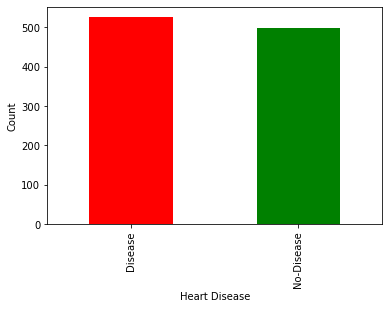

1    526
0    499
Name: target, dtype: int64

In [34]:
heart_disease=heart_data['target'].value_counts()
heart_disease.index=['Disease','No-Disease']
ax=heart_disease.plot(kind='bar',color=['red','green'])
pl.xlabel('Heart Disease')
pl.ylabel('Count')
pl.show()

heart_data['target'].value_counts()

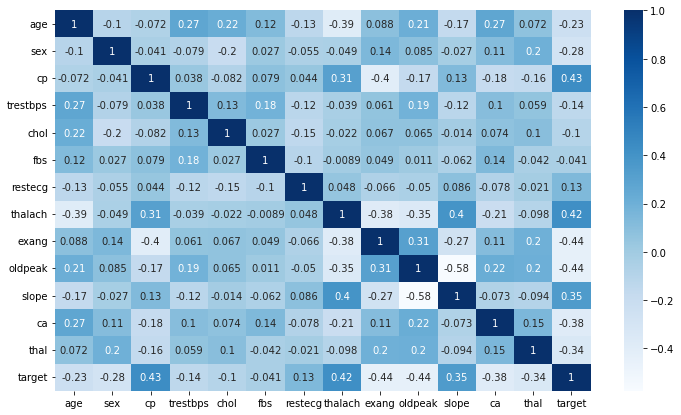

In [35]:
pl.figure(figsize=(12,7))
sns.heatmap(heart_data.corr(), annot=True, cmap='Blues')
pl.show()

In [36]:
s=heart_data[['sex','target']].value_counts()
s

sex  target
1    0         413
     1         300
0    1         226
     0          86
dtype: int64

In [37]:
import warnings
warnings.filterwarnings("ignore")

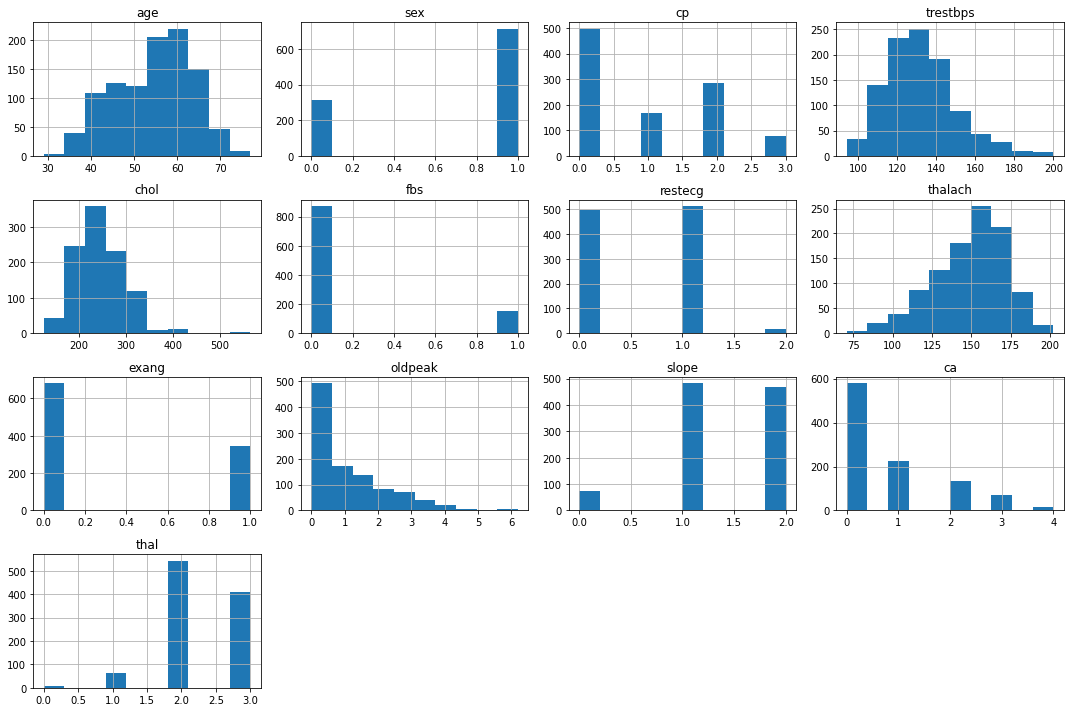

In [38]:
import matplotlib.pyplot as plt

cont_var = []
for column in heart_data.columns[:-1]: 
    cont_var.append(column)

heart_data[cont_var].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


In [39]:
X=heart_data.drop(columns='target',axis=1)
Y=heart_data['target']
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [41]:
model=LogisticRegression()

model.fit(X_train,Y_train)

LogisticRegression()

In [42]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on Training data : ',training_data_accuracy)

#accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on Test data : ',test_data_accuracy)

print("Classification Report:\n")
print(classification_report(Y_test,X_test_prediction))

Accuracy on Training data :  0.85
Accuracy on Test data :  0.8390243902439024
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       100
           1       0.80      0.92      0.85       105

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



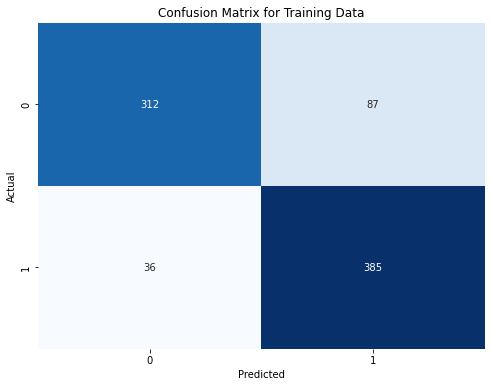

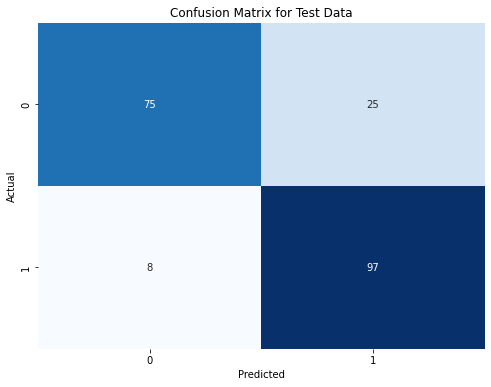

In [43]:
confusion_matrix_train = confusion_matrix(Y_train, X_train_prediction)
confusion_matrix_test = confusion_matrix(Y_test, X_test_prediction)

pl.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues", cbar=False)
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.title('Confusion Matrix for Training Data')
pl.show()

pl.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False)
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.title('Confusion Matrix for Test Data')
pl.show()

In [44]:
input_data=(53,1,0,140,203,1,0,155,1,3.1,0,0,3)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print('The person does not have a heart attack')
else:
     print('The person has a heart attack')

[0]
The person does not have a heart attack


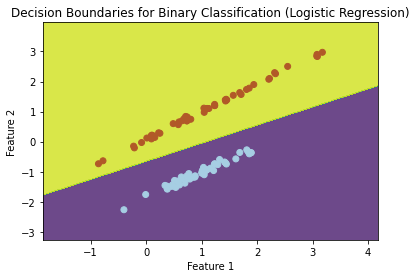

In [45]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=2, random_state=42)

model = LogisticRegression()
model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

pl.contourf(xx, yy, Z, alpha=0.8)
pl.scatter(X[:, 0], X[:, 1], c=y, cmap=pl.cm.Paired)
pl.xlabel('Feature 1')
pl.ylabel('Feature 2')
pl.title('Decision Boundaries for Binary Classification (Logistic Regression)')
pl.show()